<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Cuaderno4/Tarea_9_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUADERNO 5: AUTOFUNCIONES
1. Ninguna, el valor de Lambda no afecta a la entrada del sistema con euler complejo, ya que éste es una función propia del sistema planteado; al momento de analizar la respuesta y(t), vemos que es la misma entrada sin ningún cambio, importando únicamente la solución de la EDO.

2. No, ya que cada salida de una función es dependiente de la solución dada por la ecuación diferencial ordinaria planteada. El resultado de un sistema no es el mismo para otros, ya que sus respuestas varían respecto a sus componentes y configuraciones.

EJERCICIO: Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa.


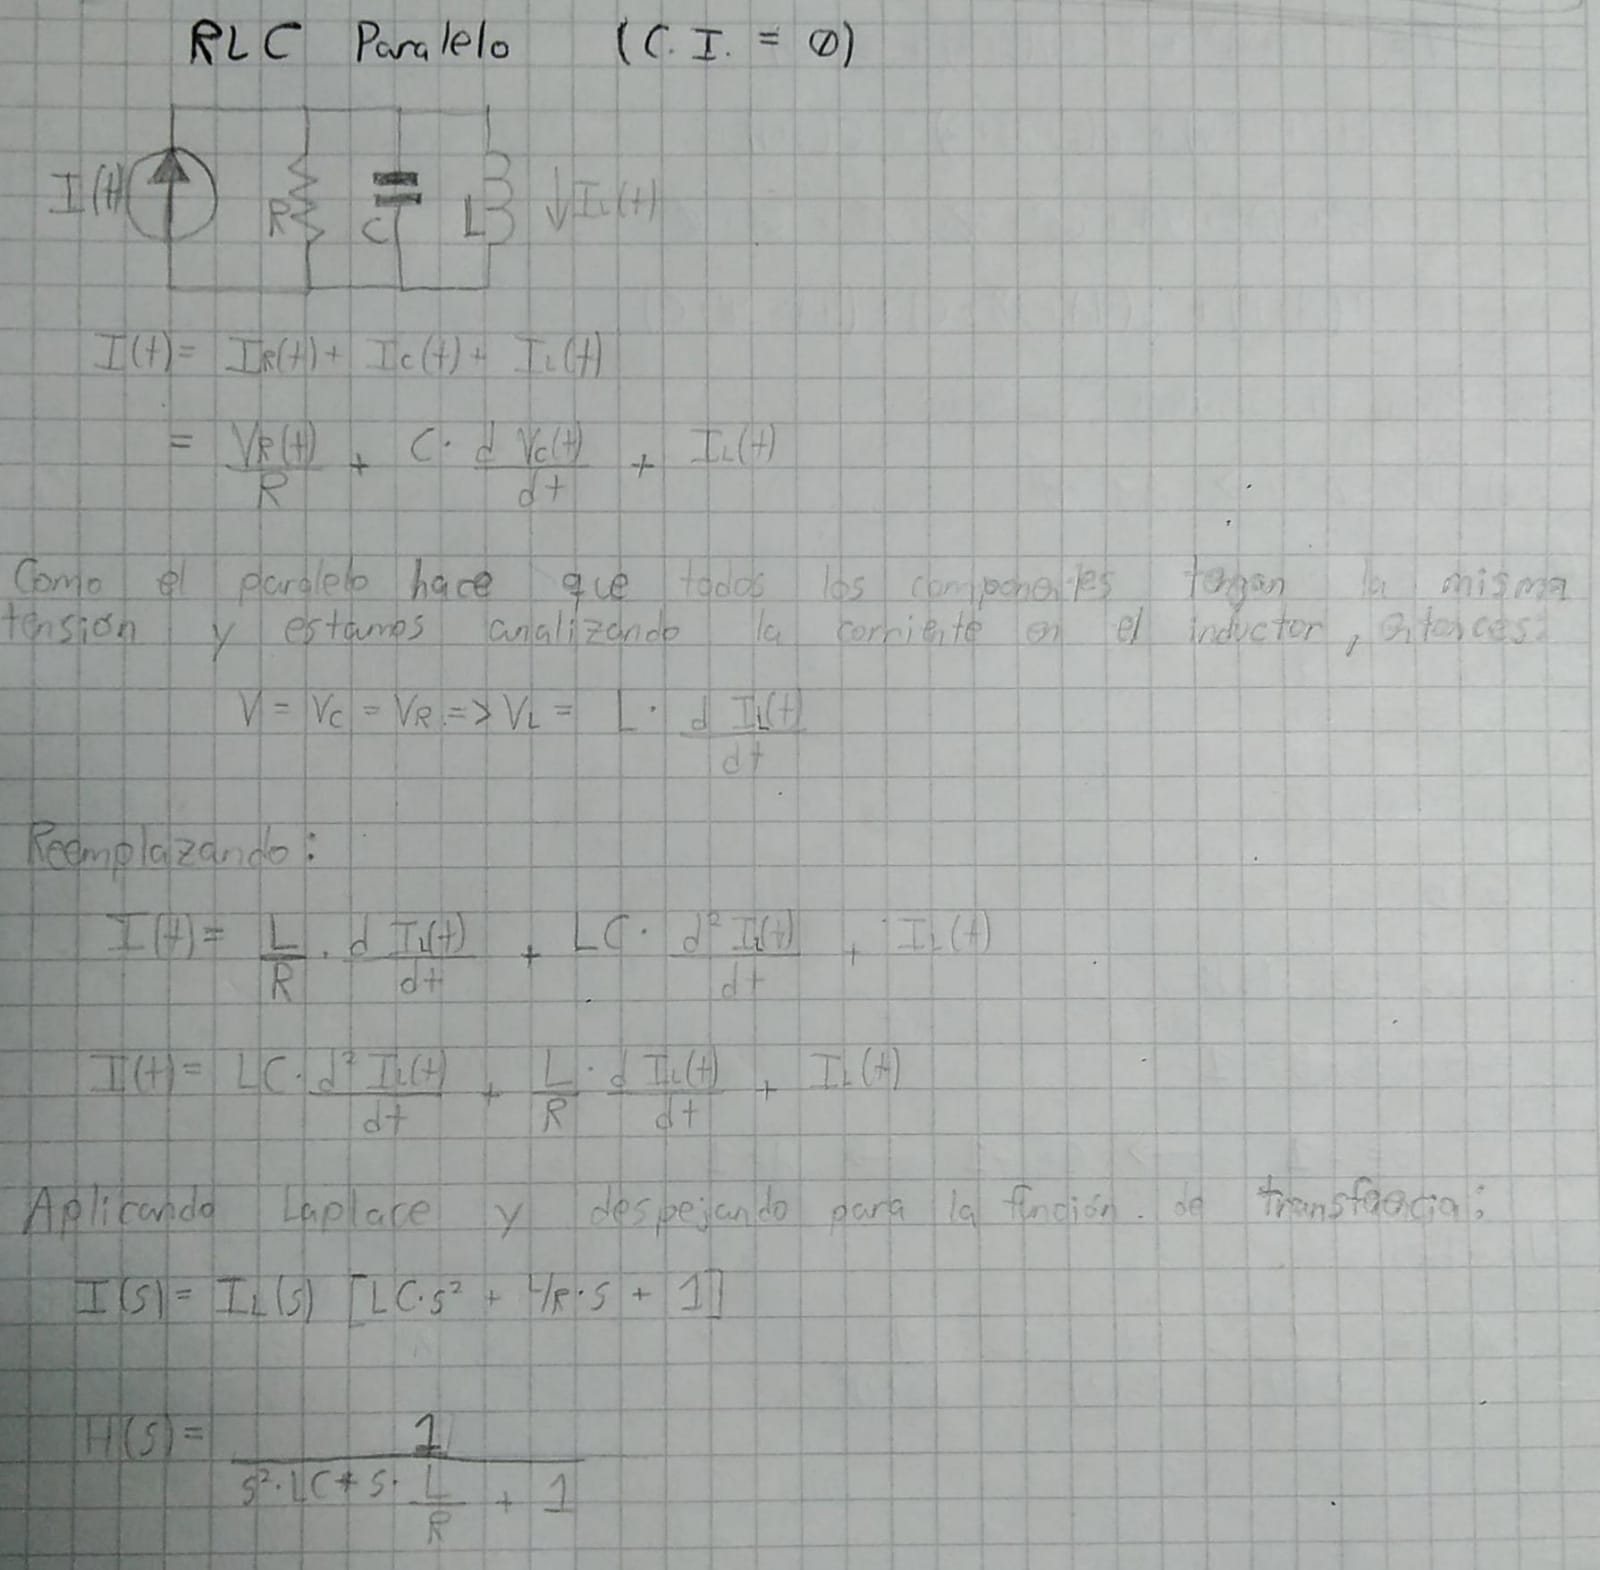

In [4]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1 # Ajustar según tipo de entrada
H = control.TransferFunction(1,L*C*s**2 + L/R*s + 1,s) #Funcion de transferencia con la API de control

Y = H.num*X/H.den#función de transferencia del circuito multiplicada por X(s)
Y

       1        
────────────────
     2   L⋅s    
C⋅L⋅s  + ─── + 1
          R     

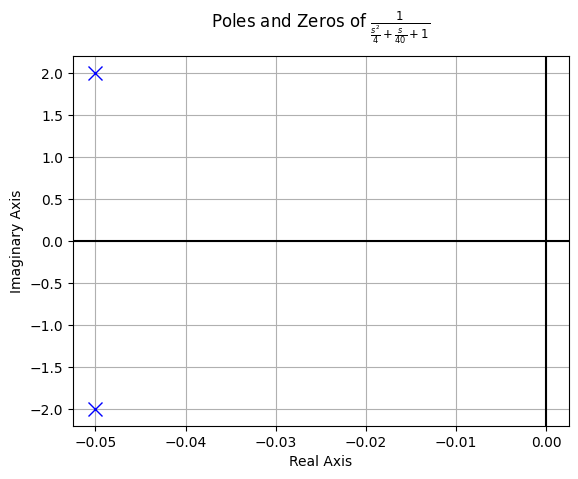

In [11]:
# @title Diagrama de Polos y Ceros
RLC = {R: 20, L: sym.Rational('.5'), C: sym.Rational('.5')} #valores utilizados para la simulación
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

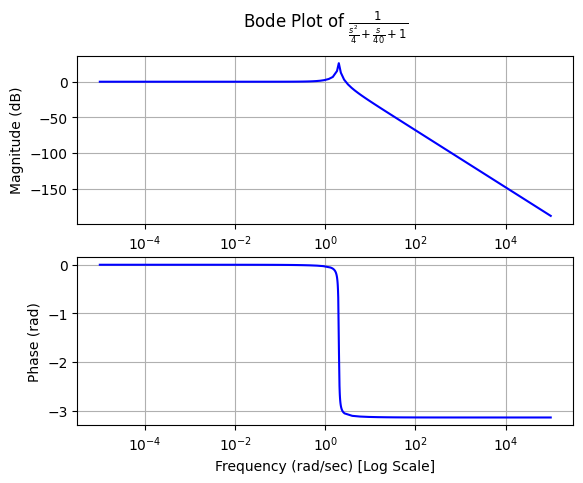

In [13]:
# @title Diagrama de Bode
control.bode_plot(HRLC)

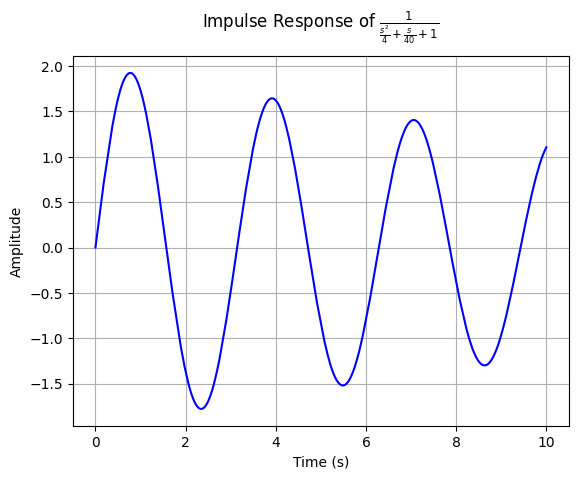

In [14]:
# @title Respuesta al Impulso
control.impulse_response_plot(HRLC)

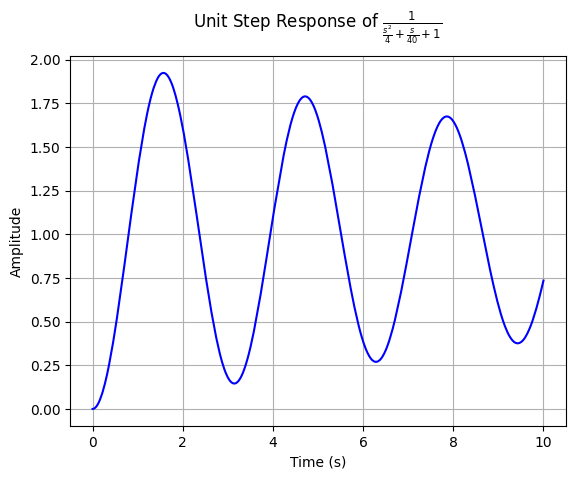

In [15]:
# @title Respuesta al Escalón
control.step_response_plot(HRLC)

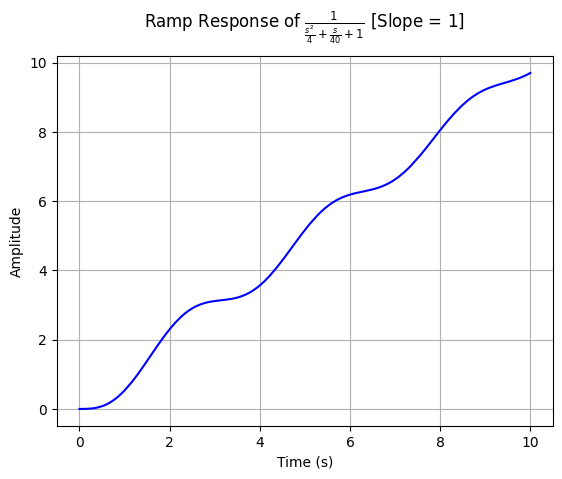

In [16]:
# @title Respuesta a la Rampa
control.ramp_response_plot(HRLC)